In [1]:
%run utilities.ipynb 

In [3]:
load_standard_packages()
change_wordir()
colors, colours = colourblind_palette("own")

#model = "PSI_only_ODE"
model = "PSI_only_QSSA"

m = load_model(model)

1.58.0

succesfully loaded PSI_only_QSSA :D


In [5]:
y0 = {'P700FA': 2.5, # all PSI in ground state
    'P700pFAm': 0.0,
    'P700FAm': 0.0,
    'PC': 0,         # all PC in reduced state
    'Fd': 5.0,       # all Fd in oxidized state
    'ps2cs': 0.525}

In [7]:
s = Simulator(m)

In [ ]:
s.initialise(y0)

s.update_parameter("pfd", 0)

_ = s.simulate(t_end = 1, steps = 2)

s.update_parameter("pfd", 10)

_ = s.simulate(t_end = 4, steps = 6)

In [8]:
# alternative:

s.initialise(y0)

pfd = 0
s.update_parameter("pfd", pfd)

_ = s.simulate(t_end = 1, steps = 2)

pfd = 1
s.update_parameter("pfd", pfd)

_ = s.simulate(t_end = 2, steps = 2)

pfd = 2
s.update_parameter("pfd", pfd)

_ = s.simulate(t_end = 3, steps = 2)

pfd = 10
s.update_parameter("pfd", pfd)

_ = s.simulate(t_end = 4, steps = 2)

<Axes: >

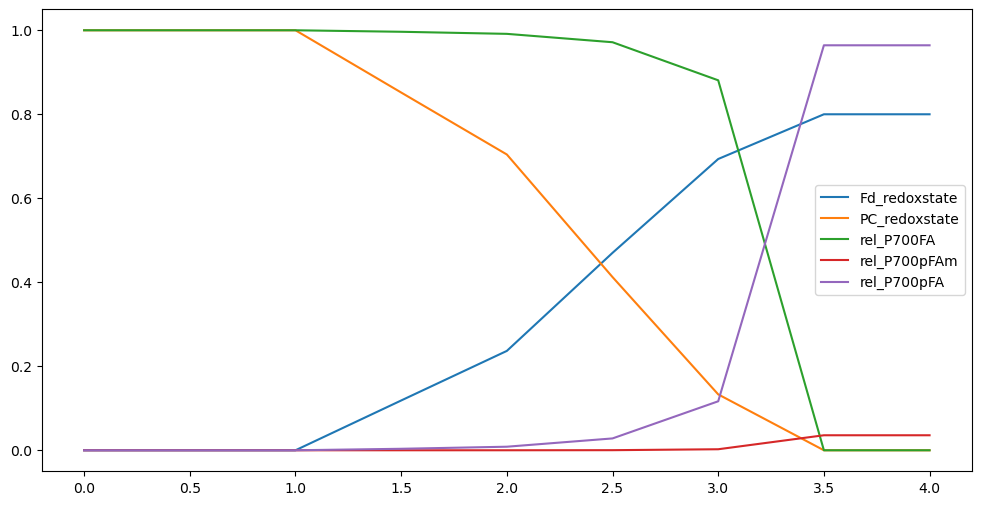

In [9]:
results = s.get_full_results_df()
results.loc[:,["Fd_redoxstate", "PC_redoxstate", "rel_P700FA", "rel_P700pFAm", "rel_P700pFA"]].plot(figsize=(12, 6))

In [ ]:
# results.loc[:,["Fd", "PC", "P700FA", "P700pFAm", "P700pFA"]]

In [13]:
# def electron_moeity(Fd, PC, P700FA, P700pFAm, P700FAm, P700pFA):
#     return (5-Fd)*1 + (4-PC)*1 + 1*P700FA + 1*P700pFAm + 1*P700FAm + 0*P700pFA

# electron_moeity(**dict(results.loc[4,["Fd", "PC", "P700FA", "P700pFAm", "P700FAm", "P700pFA"]]))


def electron_moeity(Fd, PC, P700FA, P700pFAm, P700pFA):
    return (5-Fd)*1 + (4-PC)*1 + 1*P700FA + 1*P700pFAm + 0*P700pFA

t_point2check = 4

electron_moeity(**dict(results.loc[t_point2check,["Fd", "PC", "P700FA", "P700pFAm", "P700pFA"]]))


np.float64(4.089375683587461)